# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

Del total de columnas disponibles seleccionamos tres según su relevanacia para responder a la pregunta. Tomamos como dataset la encuesta de Sysarmy del año 2022 -que se utilizó en clase- y no la del año 2020 que se encuentra en los ejercicios origiales de este notebook.


In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from itertools import islice

In [ ]:
#Actualizamos al CSV del 2022
url ='https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2022_processed.csv' 
df = pd.read_csv(url)

#Columnas elegidas
net_salary  = 'salary_monthly_NETO'
work_dedication = 'work_dedication' #Opciones con .unique(): Full-Time y Part-Time
programming_languages = 'tools_programming_languages'

Con las columnas definidas, debemos seleccionar las filas valiosas para nuestro análisis. ¿Cómo lo haremos?. En primer lugar filtraremos la columna _work_dedication_, para capturar los datos de quienes tienen jornadas laborales Full-Time. Tomamos esta decisión porque es esperable que haya mucha diferencia de salarios entre full y part-time. En base a esto, los sueldos netos asociados a las jornadas laborales completas permiten responder mejor a la pregunta original debido a que tienen una frecuencia de más de 20 veces mayor con respecto a part-time.  
_full_time_work_ apunta a un DataFrame que contiene las mismas columnas que el DataFrame original, pero que en sus filas solo tiene a aquellos que declararon trabajar en jornada completa.

Asimismo, nos aseguraremos de filtrar bien la información y no perder ningún registro en el proceso a través del siguiente test.

In [ ]:
#Aunque vamos a trabajar con los Full-Time, guardamos también los Part-Time para controlar que filtramos bien
full_time_work = df[df[work_dedication] == 'Full-Time'] #Length: 5106
part_time_work = df[df[work_dedication] == 'Part-Time'] #Length: 252

#Si la suma de los length por separado son iguales al length total del DataFrame, estamos seleccionando bien
if len(df) == len(full_time_work)+len(part_time_work):
  print('Todo bien')

else:
  print('Todo mal')

Todo bien


En segundo lugar haremos el filtrado de lenguajes de programación. Por la cantidad de lenguajes declarados dentro del DF full_time_work, tomaremos los 10 primeros en orden de frecuencia.
Aquí aparece un problema relacionado al formato de los datos en la columna 'tools_programming_languages'. 
Todo indica que quienes respondieron la encuesta eligieron múltiples lenguajes que utilizan en sus trabajos y fuero almaceados como strigs. Por ejemplo, si alguien respondió que utiliza 'Python, JavaScript y PHP' y pasamos un contador sobre esta opción, se almacenará como una única opción conformada por ese string. 

In [ ]:
languages_without_filter = full_time_work[programming_languages]
languages_without_filter

0                                             Python
1       CSS, HTML, Java, Javascript, SQL, TypeScript
2                            Javascript, PHP, Python
3                             Javascript, TypeScript
4                              CSS, HTML, Javascript
                            ...                     
5352                                             SQL
5353                       Ninguno de los anteriores
5354                       Ninguno de los anteriores
5355                                       HTML, SQL
5356                                 Javascript, SQL
Name: tools_programming_languages, Length: 5106, dtype: object

Por lo tanto, debemos hacer algún tipo de tratamiento sobre los datos para sortear esta situación.
Vamos a convertir estos strings en listas para contar cada aparición de cada lenguaje en un diccionario. Ordenaremos las apariciones de mayor a menor, sin considerar la opción 'Ninguna de las anteriores', y obtendremos el top 10.

In [ ]:
#Convertimos la columna en lista
full_time_work[programming_languages] = full_time_work[programming_languages].str.split(', ')

#Con explode enviamos cada elemento de la lista a una nueva fila aunque Pandas entiende que forman parte de la misma fila. 
#Para ver mejor como funciona usar print(each_language)
each_language = full_time_work[programming_languages].explode() 

language_counter = {}

for language in each_language:
  if language == 'Ninguno de los anteriores':
    #Si esta opción aparece, la desestimamos y vamos a una nueva iteración
    continue

  else: 
    try:
      #Si ya existe el lenguaje en el diccionario, le sumamos uno al contador
      language_counter[language] +=1
    
    except KeyError:
      #Si no existe contamos su primera aparición
      language_counter[language] = 1

#Ordenamos por cantidad de apariciones
language_counter = dict(sorted(language_counter.items(), key=lambda x: x[1], reverse=True))

#Nos quedamos con los primeros diez
top_ten_languages = dict(islice(language_counter.items(), 10))

<ipython-input-5-a85a7f1b01ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_time_work[programming_languages] = full_time_work[programming_languages].str.split(', ')


Los primeros 10 puestos muestran los mismos lenguajes (aunque no en el mismo orden debido al recorte) que en el conteo de frecuencias realizado en el archivo de consignas (ver la función split_languages), por lo que la tendencia se mantiene.
_Aunque puede argumentarse que opciones como HTML o CSS no son necesariamiente lenguajes de programación decidimos considerarlos pues su presencia es notoria._


In [ ]:
top_ten_languages

{'Javascript': 2040,
 'SQL': 1988,
 'HTML': 1451,
 'Python': 1335,
 'CSS': 990,
 'Java': 931,
 'TypeScript': 909,
 'Bash/Shell': 818,
 '.NET': 588,
 'PHP': 568}



Para asociar salarios netos con lenguajes de programación crearemos 10 nuevas columnas (booleanas) en el DataFrame, una por cada lenguaje de _top_ten_languages_. Por defecto, setearemos todos sus valores a False

In [ ]:
#Generamos las 10 nuevas columnas con False por defecto
for language in top_ten_languages:
  full_time_work[language] = False

<ipython-input-7-a3b24f66e200>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_time_work[language] = False
<ipython-input-7-a3b24f66e200>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_time_work[language] = False
<ipython-input-7-a3b24f66e200>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

Luego, recorreremos cada elemento contenido en las listas de la columna _tools_programming_languages_. Si ese lenguaje se encuentra en _top_ten_languages_ cambiamos a True el valor de esa fila para la columna correspondiente al lenguaje

In [ ]:
#Eliminamos los valores nulos
full_time_work = full_time_work.dropna(subset=[programming_languages]) 

#El único problems es que dejamos dos ciclos anidados, aunque no impacta en el rendimiento del algoritmo para el dataset
for index, row in enumerate(full_time_work[programming_languages]):

  for language in row:
    try:
      #Revisamos si el lenguaje de la lista está en el top 10
      check_language = top_ten_languages[language]

      #Seteamos a True el valor para esta posición en esta columna de lenguaje
      full_time_work.at[index, language] = True
  
    except KeyError:
      continue

<ipython-input-8-ddf3c02c3638>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_time_work.at[index, language] = True


Queda conformado entonces el DataFrame con las diez nuevas columnas con True y False según corresponda. Hay que tener en cuenta que un mismo sueldo puede tener varios lenguajes asociados.

Veamos como quedan las últimas columnas

In [ ]:
full_time_work.head()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,Javascript,SQL,HTML,Python,CSS,Java,TypeScript,Bash/Shell,.NET,PHP
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,...,True,True,True,False,True,True,True,False,False,False
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,...,True,False,False,True,False,False,False,False,False,True
3,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),440000.0,0.0,True,Cobro todo el salario en dólares,220,Cobro todo el salario criptomonedas,...,True,False,False,False,False,False,True,False,False,False
4,Argentina,Chaco,Full-Time,Staff (planta permanente),140000.0,125000.0,True,NaN,NaN,NaN,...,True,False,True,False,True,False,False,False,False,False


Con el DataFrame filtrado, vamos a responder el último inciso. Lo haremos  comparando las distribuciones de salario para cada lenguaje y utilizaremos visualizaciones.
Antes de graficar eliminaremos los valores extremos, pues el mínimo para el salario mensual neto del DataFrame es cero y el máximo es 15millones

In [ ]:
full_time_work['salary_monthly_NETO'].min()

0.0

In [ ]:
full_time_work['salary_monthly_NETO'].max()

15000000.0

Cómo cota del valor mínimo usaremos el Salario Mínimo Vital y Móvil (SMVM) del mes de agosto del 2022, momento en que la encuesta fue dada a conocer. 
Para los valores máximos tomaremos como límite 600mil pesos de salario neto. Esto se estableció luego de mirar que los outliers en boxplot se ubican por arriba de este valor

In [ ]:
SMVM = float(45540)
max_value = float(600000)

#Ordenamos de mayor a menor por si es necesario
full_time_work = full_time_work.sort_values(by=net_salary)

full_time_work_without_outliers = full_time_work[ (full_time_work['salary_monthly_NETO'] > SMVM) & (full_time_work['salary_monthly_NETO'] < max_value)]

Como queremos mostrar gráficamente los salarios asociados a estos diez lenguajes, crearemos nuevos dataframes que contengan esta información específica

In [ ]:
javascript_df = full_time_work_without_outliers.loc[full_time_work_without_outliers['Javascript'] == True]
sql_df =full_time_work_without_outliers.loc[full_time_work_without_outliers['SQL'] == True]
html_df = full_time_work_without_outliers.loc[full_time_work_without_outliers['HTML'] == True]
python_df = full_time_work_without_outliers.loc[full_time_work_without_outliers['Python'] == True]
css_df = full_time_work_without_outliers.loc[full_time_work_without_outliers['CSS'] == True]
java_df = full_time_work_without_outliers.loc[full_time_work_without_outliers['Java'] == True]
typescript_df = full_time_work_without_outliers.loc[full_time_work_without_outliers['TypeScript'] == True]
bash_df = full_time_work_without_outliers.loc[full_time_work_without_outliers['Bash/Shell'] == True]
net_df = full_time_work_without_outliers.loc[full_time_work_without_outliers['.NET'] == True]
php_df = full_time_work_without_outliers.loc[full_time_work_without_outliers['PHP'] == True]

Graficamos los 10 boxplots

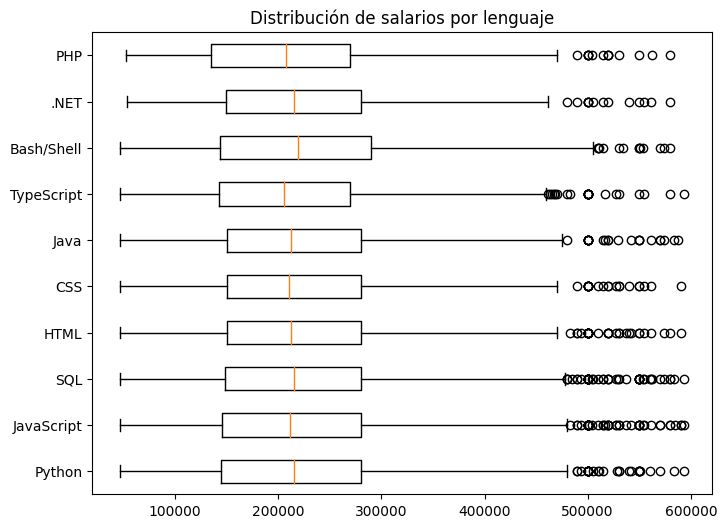

In [ ]:

dfs = [python_df, javascript_df, sql_df, html_df, css_df, java_df, typescript_df, bash_df, net_df, php_df]
languages = ['Python', 'JavaScript', 'SQL', 'HTML', 'CSS', 'Java', 'TypeScript', 'Bash/Shell', '.NET', 'PHP']
fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot([df['salary_monthly_NETO'] for df in dfs], vert=False, labels=languages)
plt.title('Distribución de salarios por lenguaje', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()


Observando estos valores no parece existir un lenguaje en el que se tenga una ventaja sustancial respecto de los otros. Basandonos en el gráfico podríamos decir que la mejor apuesta a conseguir un buen salario está en Bash/Shell.

#Ejercicio 2 - Densidades y Varias variables

Para responder este ejercicio se decidió trabajar con el dataframe del ejercicio 1, el cual ya tiene filtrado las respuestas para full-time without outliers


##a) Densidad Conjunta

Las variables categóricas seleccionadas son: salario en dolares, provincia/lugar de residencia.
Las variables númericas: años de experiencia, edad y salario neto. 
En todos los casos se realizó un trabajo preliminar haciendo una vista de los posibles valores que toma cada variable para luego hacer un filtrado con valores acordes a lo esperable.

###Variable Categorica: salary_in_usd

In [ ]:
full_time_work_without_outliers.salary_in_usd.unique()

array([nan, 'Cobro parte del salario en dólares',
       'Mi sueldo está dolarizado (pero cobro en moneda local)',
       'Cobro todo el salario en dólares'], dtype=object)

In [ ]:
full_time_work_without_outliers.salary_in_usd.describe()

count                                    966
unique                                     3
top       Cobro parte del salario en dólares
freq                                     544
Name: salary_in_usd, dtype: object

El count de esta columna es mucho menor que el total del dataframe (+5000). Entones para tener en cuenta los valores nulos (sueldos no dolarizados) realizamos el siguiente reemplazo y agrupamiento de datos. 

In [ ]:
full_time_work_without_outliers.loc[:,'salary_in_usd_bool'] = \
  full_time_work_without_outliers.salary_in_usd.replace({'Cobro todo el salario en dólares': True, 'Cobro parte del salario en dólares': True, 'Mi sueldo está dolarizado (pero cobro en moneda local)' : True}).fillna(False)
print(full_time_work_without_outliers.salary_in_usd_bool.unique())

[False  True]


<ipython-input-231-225c1493d56a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_time_work_without_outliers.loc[:,'salary_in_usd_bool'] = \


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


[Text(0, 0, 'False'), Text(1, 0, 'True')]

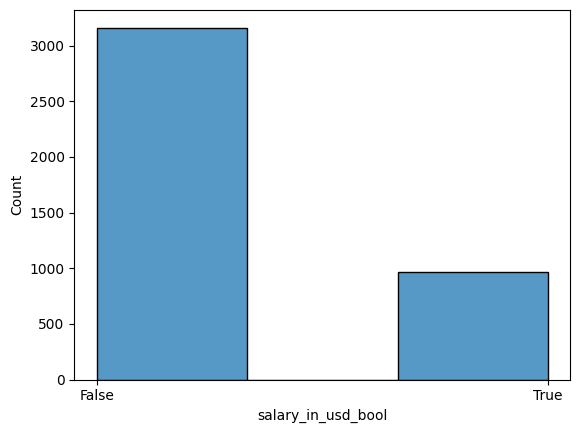

In [ ]:
figura= plt.figure()
ejes = figura.add_subplot()
seaborn.histplot(full_time_work_without_outliers.salary_in_usd_bool, bins=3)
ejes.set_xticks([0,1])
ejes.set_xticklabels(['False','True'])


###Variable Categorica: work_province

In [ ]:
full_time_work_without_outliers.work_province.value_counts()

Ciudad Autónoma de Buenos Aires    2105
Provincia de Buenos Aires           840
Córdoba                             370
Santa Fe                            263
Mendoza                             105
Entre Ríos                           57
Chaco                                45
Misiones                             39
Río Negro                            37
Neuquén                              36
Salta                                36
Corrientes                           32
Tucumán                              30
San Juan                             26
Jujuy                                26
Chubut                               18
San Luis                             15
La Rioja                             14
Tierra del Fuego                     10
Santiago del Estero                   8
Santa Cruz                            7
La Pampa                              6
Formosa                               1
Catamarca                             1
Name: work_province, dtype: int64

Se decide agrupar ciertas provincias en regiones con el fin de tener datos más comparables y representativos. Por densidad poblacional se decide dejar CABA, Provincia de Buenos Aires, Santa Fé y Córdoba sin agrupamiento

In [ ]:
full_time_work_without_outliers.loc[:,'work_region'] = full_time_work.work_province.replace({'Entre Ríos': 'R. Pampeana', 'La Pampa': 'R. Pampeana', 'San Luis': 'R. Cuyo', 'San Juan': 'R. Cuyo', 'La Rioja': 'R. Cuyo', 'Mendoza': 'R. Cuyo', 'Río Negro': 'R. Patagonia', 'Neuquén': 'R. Patagonia', 'Chubut': 'R. Patagonia', 'Tierra del Fuego': 'R. Patagonia', 'Santa Cruz': 'R. Patagonia', 'Tucumán': 'R. Noroeste', 'Jujuy': 'R. Noroeste', 'Salta': 'R. Noroeste', 'Catamarca': 'R. Noroeste', 'Santiago del Estero': 'R. Noroeste', 'Misiones': 'R. Nordeste', 'Chaco': 'R. Nordeste', 'Corrientes': 'R. Nordeste', 'Formosa': 'R. Nordeste' }).fillna(False)
full_time_work_without_outliers.work_region.unique()

<ipython-input-234-765a8cfc70fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_time_work_without_outliers.loc[:,'work_region'] = full_time_work.work_province.replace({'Entre Ríos': 'R. Pampeana', 'La Pampa': 'R. Pampeana', 'San Luis': 'R. Cuyo', 'San Juan': 'R. Cuyo', 'La Rioja': 'R. Cuyo', 'Mendoza': 'R. Cuyo', 'Río Negro': 'R. Patagonia', 'Neuquén': 'R. Patagonia', 'Chubut': 'R. Patagonia', 'Tierra del Fuego': 'R. Patagonia', 'Santa Cruz': 'R. Patagonia', 'Tucumán': 'R. Noroeste', 'Jujuy': 'R. Noroeste', 'Salta': 'R. Noroeste', 'Catamarca': 'R. Noroeste', 'Santiago del Estero': 'R. Noroeste', 'Misiones': 'R. Nordeste', 'Chaco': 'R. Nordeste', 'Corrientes': 'R. Nordeste', 'Formosa': 'R. Nordeste' }).fillna(False)


array(['R. Cuyo', 'Provincia de Buenos Aires', 'Córdoba',
       'Ciudad Autónoma de Buenos Aires', 'R. Nordeste', 'Santa Fe',
       'R. Pampeana', 'R. Noroeste', 'R. Patagonia'], dtype=object)

In [ ]:
full_time_work_without_outliers.work_region.value_counts()

Ciudad Autónoma de Buenos Aires    2105
Provincia de Buenos Aires           840
Córdoba                             370
Santa Fe                            263
R. Cuyo                             160
R. Nordeste                         117
R. Patagonia                        108
R. Noroeste                         101
R. Pampeana                          63
Name: work_region, dtype: int64

<Axes: xlabel='Count', ylabel='work_region'>

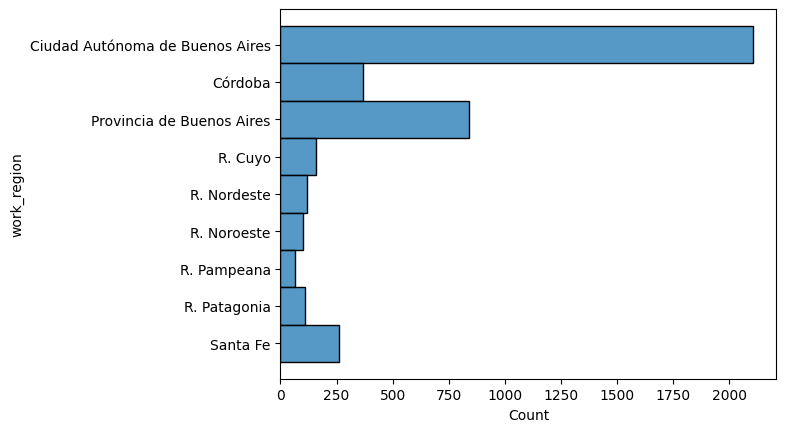

In [ ]:
seaborn.histplot(y = full_time_work_without_outliers.work_region.sort_values(), bins=3)

###Variable Númerica: profile_years_experience

In [ ]:
full_time_work_without_outliers.profile_years_experience.describe().round()

count    4127.0
mean        7.0
std         7.0
min         0.0
25%         2.0
50%         5.0
75%        11.0
max        45.0
Name: profile_years_experience, dtype: float64

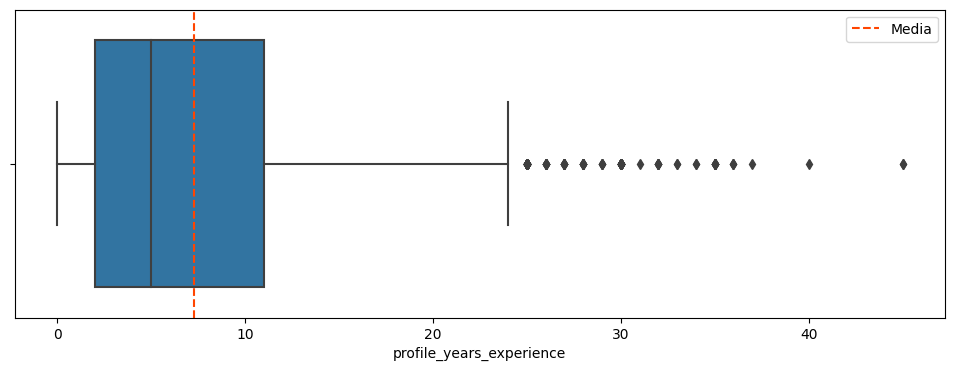

In [ ]:
fig, axes = plt.subplots(figsize=(12, 4))
seaborn.boxplot(x=full_time_work_without_outliers.profile_years_experience, ax=axes)
axes.axvline(full_time_work_without_outliers.profile_years_experience.mean(), color='orangered',
            linestyle='--', label='Media')
plt.legend()

El boxplot sumado a los datos posicionales dan información acerca de la distribucion. 75% de los valores están agrupados entre los 0 y 11 años de experiencia. El cuartil superior tiene una disperción entre 11 y 45 años, con existencia de outliers.  La media no coincide con la mediana.

###Variable Númerica: salario_neto

In [ ]:
#se utiliza el data frame con esta variable ya filtrada 
full_time_work_without_outliers['salary_monthly_NETO'].describe().round()

count      4127.0
mean     225129.0
std      106897.0
min       47000.0
25%      143000.0
50%      210000.0
75%      280000.0
max      593415.0
Name: salary_monthly_NETO, dtype: float64

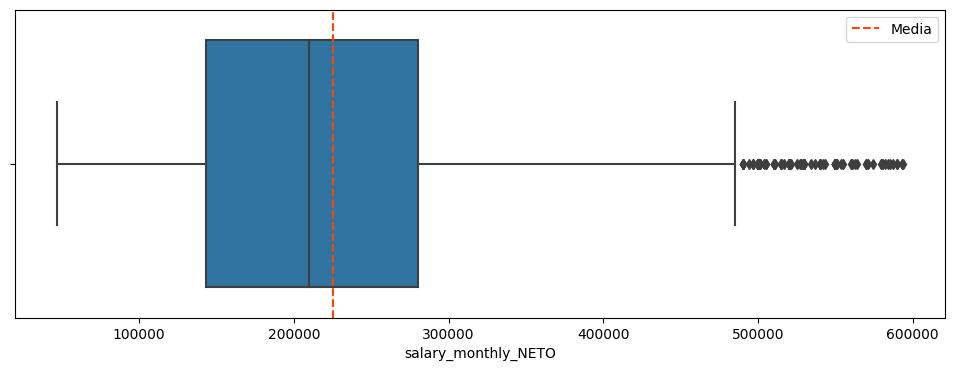

In [ ]:
fig, axes = plt.subplots(figsize=(12, 4))
plt.ticklabel_format(style='plain')
seaborn.boxplot(x=full_time_work_without_outliers['salary_monthly_NETO'], ax=axes)
axes.axvline(full_time_work_without_outliers.salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
plt.legend()

 Al ser similares los bigotes, de las variables analizadas es la que esta mas cerca de parecerse a una distribución norma. Sin embargo, esto no sucede porque la media no coincide con la mediana.

###Variable Númerica: profile_age

In [ ]:
full_time_work_without_outliers.profile_age.describe().round()

count    4127.0
mean       33.0
std         8.0
min        19.0
25%        27.0
50%        32.0
75%        38.0
max        67.0
Name: profile_age, dtype: float64

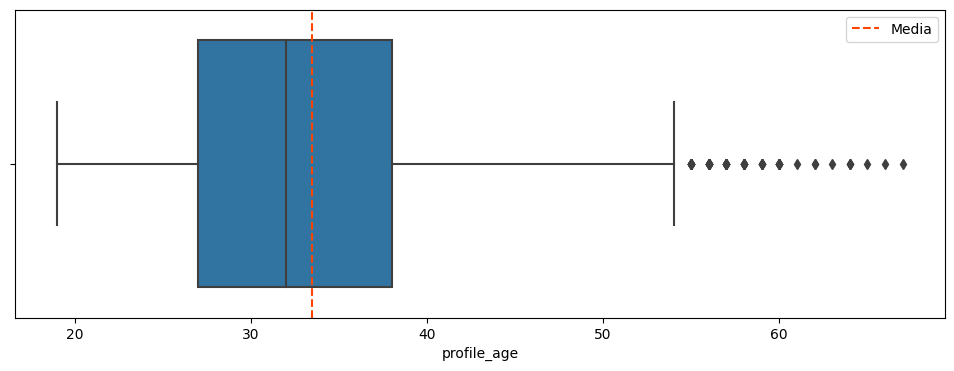

In [ ]:
fig, axes = plt.subplots(figsize=(12, 4))
seaborn.boxplot(x=full_time_work_without_outliers.profile_age, ax=axes)
axes.axvline(full_time_work_without_outliers.profile_age.mean(), color='orangered',
            linestyle='--', label='Media')
plt.legend()

### Calculos de probabilidades conjuntas. 
Se plantearon algunas preguntas que son posibles de responder con nuestra base da datos a modo de ejemplo para la probabilidad conjunta.

¿Cuál es la probabilidad de tener un sueldo por encima del promedio y residir en la región patagonica? ¿Cuál es la diferencia con Ciudad Autonoma de Buenos Aires (CABA)?

In [ ]:
filtered_NETO_avg = full_time_work_without_outliers["salary_monthly_NETO"].mean()
above_avg= full_time_work_without_outliers[full_time_work_without_outliers.salary_monthly_NETO >= filtered_NETO_avg] #df
count_total_df= len(full_time_work_without_outliers)
prob_above_avg= len(above_avg)/count_total_df
print(f"La probabilidad de tener un sueldo NETO por encima del promedio es {prob_above_avg:.2%}.")


La probabilidad de tener un sueldo NETO por encima del promedio es 44.12%.


In [ ]:
prob_patagonia = len(full_time_work_without_outliers[full_time_work_without_outliers.work_region == "R. Patagonia"] )/ count_total_df
print(f"La probabilidad de trabajar en Patagonia es {prob_patagonia:.2%}.")
prob_CABA = len(full_time_work_without_outliers[full_time_work_without_outliers.work_region == "Ciudad Autónoma de Buenos Aires"] )/count_total_df
print(f"La probabilidad de trabajar en CABA es {prob_CABA:.2%}.")

La probabilidad de trabajar en Patagonia es 2.62%.
La probabilidad de trabajar en CABA es 51.01%.


In [ ]:
patagonia_count=full_time_work_without_outliers['work_region']== 'R. Patagonia' #booleanos
above_avg_bool=full_time_work_without_outliers['salary_monthly_NETO'] >= filtered_NETO_avg #booleanos
prob_patagonia_above_avg= len(full_time_work_without_outliers[patagonia_count & above_avg_bool])/ count_total_df
print(f'La probabilidad de tener un sueldo neto por encima del promedio y trabajar en la Patagonia es {prob_patagonia_above_avg:.2%}.')



La probabilidad de tener un sueldo neto por encima del promedio y trabajar en la Patagonia es 1.02%.


In [ ]:
caba_count=full_time_work_without_outliers['work_region']== 'Ciudad Autónoma de Buenos Aires' 
prob_caba_above_avg= len(full_time_work_without_outliers[caba_count & above_avg_bool])/ count_total_df
print(f'La probabilidad de tener un sueldo neto por encima del promedio y trabajar en CABA es {prob_caba_above_avg:.2%}.')

La probabilidad de tener un sueldo neto por encima del promedio y trabajar en CABA es 25.81%.


Respuesta a la pregunta
En primer lugar podemos decir que hay interseccion entre los conjuntos "Trabajar en Patagonia" y "Ganar por encima del salario neto" porque la probabilidad es no nula. Lo mismo sucede entre "Trabajar en CABA" y "Ganar por encima del promedio". Sin embargo, hay una diferencia muy grande, trabajando en CABA hay probabilidad del 25,81% de ganar más que el promedio, mientras que en Patagonia sólo del 1,02%. Esto es reflejo de la distribución de programadores en el país, ya que a su vez la probabilidad de trabajar en Patagonia es aproximadamente 25 veces menor que en CABA. 

La siguiente pregunta que nos planteamos relaciona la variable "Salario_Neto" con la variable "profile_age". ¿En cuánto a la edad, es más probable que el rango etario por encima de la media gane más dinero que el que esta por debajo?

In [ ]:
filtered_age_avg = full_time_work_without_outliers["profile_age"].mean()
above_avg_age= full_time_work_without_outliers[full_time_work_without_outliers.profile_age >= filtered_age_avg] #df
above_avg_age_bool= full_time_work_without_outliers["profile_age"] >= filtered_age_avg #bool
prob_age_above_avg = len(above_avg_age)/count_total_df
print(f"La probabilidad de tener una edad por encima del promedio es {prob_age_above_avg:.2%}.")

La probabilidad de tener una edad por encima del promedio es 43.71%.


In [ ]:
prob_age_neto_above_avg= len(full_time_work_without_outliers[above_avg_age_bool & above_avg_bool])/ count_total_df
print(f'La probabilidad de tener un sueldo neto por encima del promedio y edad por encima del promedio es {prob_age_neto_above_avg:.2%}.')

La probabilidad de tener un sueldo neto por encima del promedio y edad por encima del promedio es 24.84%.


In [ ]:
below_avg_age= full_time_work_without_outliers[full_time_work_without_outliers.profile_age <= filtered_age_avg] #df
below_avg_age_bool= full_time_work_without_outliers["profile_age"] <= filtered_age_avg #bool
prob_age_below_avg = len(below_avg_age)/count_total_df
print(f"La probabilidad de tener una edad por encima del promedio es {prob_age_below_avg:.2%}.")
prob_age_neto_below_avg= len(full_time_work_without_outliers[below_avg_age_bool & above_avg_bool])/ count_total_df
print(f'La probabilidad de tener un sueldo neto por encima del promedio y edad por abajo del promedio es {prob_age_neto_below_avg:.2%}.')

La probabilidad de tener una edad por encima del promedio es 56.29%.
La probabilidad de tener un sueldo neto por encima del promedio y edad por abajo del promedio es 19.29%.


Podemos ver que las personas que estan por encima de la media (33 años)  de la edad tienen una probabilidad del 24,84% de ganar por encima de la media. Este número es mayor que para el grupo que tiene menos de 33 años, cuya probabilidad de ganar por encima del neto medio es 19,29%. Sin embargo, los números no son tan distantes, por lo que podríamos decir que la edad no afecta tanto a la probabilidad de ganar más que la media.  

##b) Asociación
Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple. ¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría

##Respuesta
Para decidir si existe una correlación entre el salario bruto y el neto se utilizó la base de datos previamente filtrada.

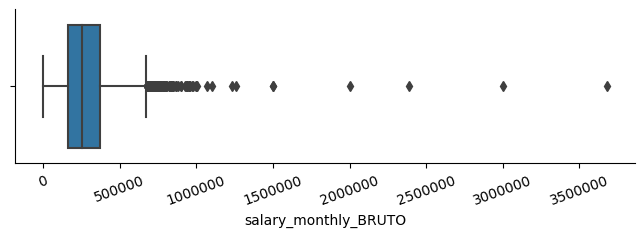

In [ ]:
#boxplot de los datos de salario bruto desde la base de datos filtrada. A partir del mismo se analiza si algún dato se debe quitar (ej algún valor >1000000)
salary_col_BRUTO='salary_monthly_BRUTO'
plt.figure(figsize=(8, 2))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=20)
seaborn.boxplot(x=full_time_work_without_outliers[salary_col_BRUTO])
seaborn.despine()

In [ ]:
full_time_work_without_outliers['salary_monthly_BRUTO'].describe().round()

count       4127.0
mean      292113.0
std       185298.0
min            0.0
25%       166000.0
50%       255000.0
75%       370000.0
max      3677888.0
Name: salary_monthly_BRUTO, dtype: float64

In [ ]:
#se filtra el salario bruto a valores entre SMVM Y 600mil ya que al igual que para sueldo NETO este numero ya representa un outliers segun el boxplot
filtered_BRUTO_df = full_time_work_without_outliers[ (full_time_work_without_outliers['salary_monthly_BRUTO'] > SMVM) & (full_time_work_without_outliers['salary_monthly_BRUTO'] < max_value)]
#datos de estadística descriptiva para datos del salario BRUTO filtrado. Round para no tener notacion cientifica.
filtered_BRUTO_df['salary_monthly_BRUTO'].describe().round()

count      3835.0
mean     265324.0
std      125395.0
min       46000.0
25%      163766.0
50%      247000.0
75%      348212.0
max      599650.0
Name: salary_monthly_BRUTO, dtype: float64

A partir de los datos filtrados, se realizó un gráfico de dispersión para observar si existe alguna relación entre estas variables:

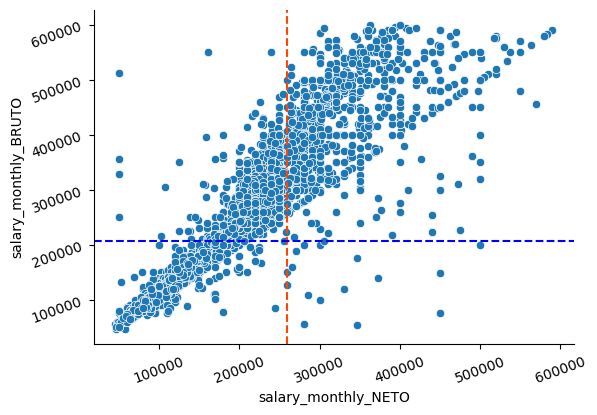

In [ ]:
#filtrar la base por algún valor de salario bruto de ser necesario. Sino continuar trabajando con la misma base anterior.
df_filtered=df[(df.salary_monthly_BRUTO < max_value) & (df.salary_monthly_BRUTO > SMVM) & (df.salary_monthly_NETO < max_value) & (df.salary_monthly_NETO > SMVM)]
#gráfico de dispersión Bruto vs Neto. Actualizas el df filtrado
seaborn.pairplot(data=df_filtered, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=1.5, height=4)
plt.xticks(rotation=20)
plt.yticks(rotation=20)
plt.ticklabel_format(style='plain')
plt.axvline(df_filtered['salary_monthly_BRUTO'].mean(), color='orangered',
            linestyle='--', label='Media BRUTO')
plt.axhline(df_filtered['salary_monthly_NETO'].mean(), color='blue',
            linestyle='--', label='Media NETO')

A partir del gráfico, se puede observar que a medida que el salario bruto crece, el salario neto también, tal como era de esperar. Al observar los cuadrantes generados por las medias de ambas variables, se observa que la mayoría de los datos se encuentran en los cuadrantes 1 y 3, indicando que ambas variables están correlacionadas positivamente.
También fue posible observar respuestas que no pueden ser verdaderas, tales como:
- Valores de salario neto mayores a los del mismo salario pero bruto.
- Valores de salario bruto casi 10 veces más grandes que los del mismo salario pero neto.
Esto indica que ambas preguntas pueden resultar confusas para algunos encuestados.

También se calculó el coeficiente de correlación entre ambas variables:

In [ ]:
matcov=np.cov(df_filtered.salary_monthly_BRUTO,df_filtered.salary_monthly_NETO)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_filtered.salary_monthly_BRUTO,df_filtered.salary_monthly_NETO)
print('matriz de correlaciones:', '\n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

matriz de varianza covarianza: 
 [[1.60153901e+10 1.05335138e+10]
 [1.05335138e+10 8.47494608e+09]] 

matriz de correlaciones: 
  [[1.         0.90414073]
 [0.90414073 1.        ]] 

correlación entra ambas variables:  0.9041407332816853 



Se obtuvo un grado de correlación del 90%, resultado coincidente con lo observado en el gráfico de dispersión.

De esta manera, se puede concluir que ambas variables están correlacionadas de manera positva en un alto porcentaje. Teniendo en cuenta este resultado y, como se mencionó anteriormente, estas preguntas resultaron confusas para algunos encuestados, se puede optar por quitar la columna de salario bruto para simplificar la encuesta.
Sin embargo, se debe remarcar que, al quitar esta columna, se puede perder información relevante, tal como el porcentaje de deducciones y retensiones propias del salario.

##c) Densidad condicional
Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable 'salary_monthly_NETO' ¿Considera que ambas variables son independientes? ¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación

Para comenzar, se realizó un gráfico de barras para comparar el tamaño de la población de cada nivel de estudios de la encuesta:

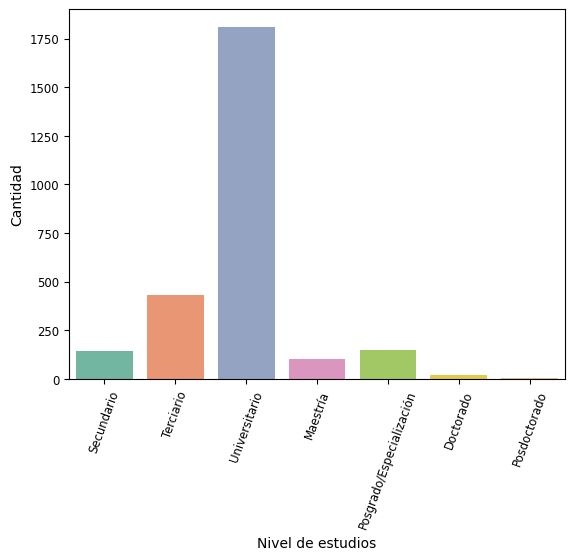

In [ ]:
sorted_studies_levels = ['Secundario', 'Terciario', 'Universitario',
                         'Maestría','Posgrado/Especialización', 'Doctorado', 'Posdoctorado']#lista de los nombres de categorías ordenadas

seaborn.countplot(x= df.profile_studies_level.dropna(), #gráfico de conteos ordenado (en el lugar 1)
                  order=sorted_studies_levels, palette='Set2')
plt.yticks(size='small')
plt.xticks(rotation=70,size='small')
plt.xlabel('Nivel de estudios')
plt.ylabel('Cantidad')
plt.show()

A partir de este gráfico, se eligieron nivel universitario y nivel terciario como las dos subpoblaciones numerosas para analizar.

A continuación se graficaron los histogramas de salario neto de ambas subpoblaciones junto con su media: 

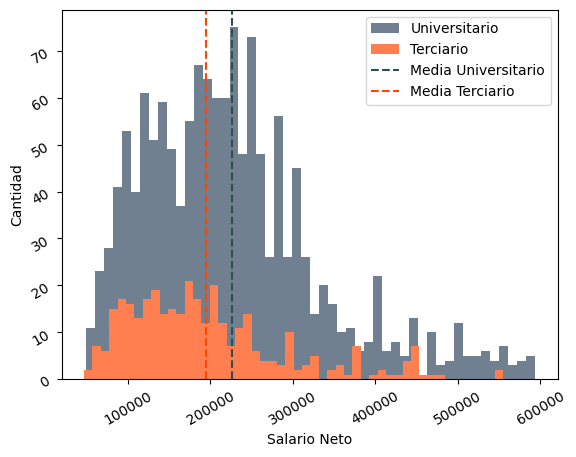

In [ ]:
df_Univ= full_time_work_without_outliers[ full_time_work_without_outliers['profile_studies_level']=='Universitario']
df_Terc= full_time_work_without_outliers[full_time_work_without_outliers['profile_studies_level']=='Terciario']


plt.hist(df_Univ['salary_monthly_NETO'], color='slategrey', bins=50, label='Universitario')
plt.hist(df_Terc['salary_monthly_NETO'], color='coral', bins=50, label='Terciario') #aca importa el orden, cuidado con la superposición
plt.ticklabel_format(style='plain')
plt.axvline(df_Univ['salary_monthly_NETO'].mean(), color='darkslategrey',
            linestyle='--', label='Media Universitario')
plt.axvline(df_Terc['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media Terciario')
plt.legend()
plt.tick_params(labelrotation=30)
plt.xlabel('Salario Neto')
plt.ylabel('Cantidad')
plt.show()



In [ ]:
print(df_Univ['salary_monthly_NETO'].describe())

coef_var_Univ = df_Univ['salary_monthly_NETO'].std()/df_Univ['salary_monthly_NETO'].mean()
print(
    f"El coeficiente de variación del salario neto en el nivel universitario es: {coef_var_Univ:.2}")

count      1390.000000
mean     225639.153151
std      109065.459546
min       49000.000000
25%      143192.500000
50%      211100.000000
75%      280000.000000
max      593415.000000
Name: salary_monthly_NETO, dtype: float64
El coeficiente de variación del salario neto en el nivel universitario es: 0.48


In [ ]:
print(df_Terc['salary_monthly_NETO'].describe().round())

coef_var_Terc = df_Terc['salary_monthly_NETO'].std()/df_Terc['salary_monthly_NETO'].mean()
print(
    f"El coeficiente de variación del salario neto en el nivel terciario es: {coef_var_Terc:.2}")

count       340.0
mean     195054.0
std       99348.0
min       47000.0
25%      122494.0
50%      172900.0
75%      241000.0
max      555000.0
Name: salary_monthly_NETO, dtype: float64
El coeficiente de variación del salario neto en el nivel terciario es: 0.51


A partir de los histogramas y los valores de estadística descriptiva del salario neto en ambas subpoblaciones, se puede mencionar que no tienen la misma media ya que la media en para nivel universitario es mayor y que ambas subpoblaciones poseen un coeficiente de variación similar. Además, es importante destacar que la cantidad de datos de cada población es muy distinta. La de nivel universitario es 5 veces más grande que la de terciario.

Teniendo en cuenta esta diferencia en las medias, se procedió a estudiar la probabilidad de tener un salario neto mayor al promedio y la probabilidad condicional de que se cumpla este requisito y además, ser parte de alguna de estas dos subpoblaciones.

In [ ]:
avg_salary_NETO = full_time_work_without_outliers['salary_monthly_NETO'].mean()  #salario promedio
avg_salary_NETO

225128.58036346012

In [ ]:
above_avg =full_time_work_without_outliers['salary_monthly_NETO']>= avg_salary_NETO #lista de booleanos
univ_grade = full_time_work_without_outliers['profile_studies_level'] == 'Universitario'  #lista debooleanos
terc_grade = full_time_work_without_outliers['profile_studies_level'] == 'Terciario'  #lista debooleanos
prob_above_avg = len(full_time_work_without_outliers[above_avg]) / len(full_time_work_without_outliers)

prob_cond_above_avg_dado_univ=len(full_time_work_without_outliers[above_avg & univ_grade])/len(full_time_work_without_outliers[univ_grade])
prob_cond_above_avg_dado_terc=len(full_time_work_without_outliers[above_avg & terc_grade])/len(full_time_work_without_outliers[terc_grade])

print(f"La probabilidad de ganar más de la media es {prob_above_avg:.2%}.")
print(f"La probabilidad de ganar más de la media con un nivel universitario es {prob_cond_above_avg_dado_univ:.2%}.")
print(f"La probabilidad de ganar más de la media con un nivel terciario es {prob_cond_above_avg_dado_terc:.2%}.")


La probabilidad de ganar más de la media es 44.12%.
La probabilidad de ganar más de la media con un nivel universitario es 44.39%.
La probabilidad de ganar más de la media con un nivel terciario es 28.24%.


Se puede observar que las personas con nivel de estudio universitario tienen la misma probabilidad de ganar más que el promedio que la población total que respondió la encuesta. Sin embargo, no ocurre lo mismo para las personas con nivel de estudio terciario. Dentro de este subgrupo, la probabilidad de ganar más que la media disminuye del 37% a solo el 25%. Esto indica que estas variables no son completamente independientes. Probablemente la similitud entre el subgrupo universitario y el total de la muestra de los encuestados se debe a que la mayoría de los encuestados poseen este nivel de estudio.

##d) Densidad conjunta condicional

Se decidió estudiar las variables númericas "años de experiencia" y "salario neto" discriminadas según la variable categorica "salario en dolares". 

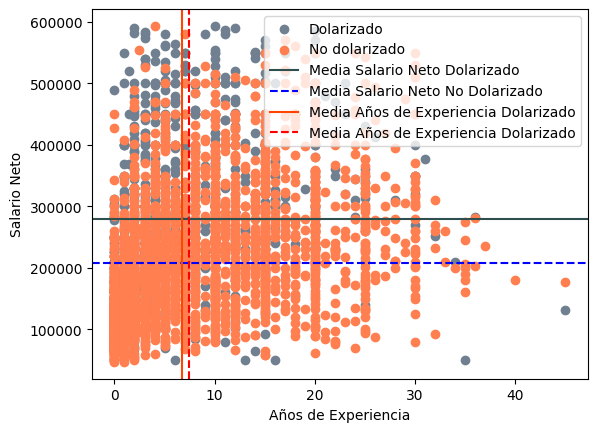

In [ ]:
df_dolar=full_time_work_without_outliers[full_time_work_without_outliers["salary_in_usd_bool"] == True] 
df_nodolar= full_time_work_without_outliers[full_time_work_without_outliers["salary_in_usd_bool"] == False] 

plt.scatter(x=df_dolar['profile_years_experience'], y=df_dolar['salary_monthly_NETO'], color='slategrey', label= "Dolarizado")
plt.scatter(x=df_nodolar['profile_years_experience'], y=df_nodolar['salary_monthly_NETO'], color='coral', label= "No dolarizado")

#seaborn.pairplot(data=df_nodolar, y_vars=['salary_monthly_NETO'],
 #                x_vars=['profile_years_experience'],
 #                aspect=1.5, height=4)


plt.ticklabel_format(style='plain')
plt.axhline(df_dolar['salary_monthly_NETO'].mean(), color='darkslategrey',
            linestyle='solid', label='Media Salario Neto Dolarizado')
plt.axhline(df_nodolar['salary_monthly_NETO'].mean(), color='blue',
            linestyle='--', label='Media Salario Neto No Dolarizado')

plt.axvline(df_dolar['profile_years_experience'].mean(), color='orangered',
           linestyle='solid', label='Media Años de Experiencia Dolarizado')

plt.axvline(df_nodolar['profile_years_experience'].mean(), color='red',
           linestyle='--', label='Media Años de Experiencia Dolarizado')
plt.legend()
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario Neto')
plt.show()

Podemos decir que estas dos variables no tienen una correlación positiva apresiable visualmente para ninguno de los dos casos (dolarizado o no). 

In [ ]:
corrd=np.corrcoef(df_dolar.salary_monthly_BRUTO,df_dolar.profile_years_experience)
print('correlación entra ambas variables para los que cobran en dolares: ',corrd[0,1],'\n')

correlación entra ambas variables para los que cobran en dolares:  0.2901402995438284 



In [ ]:
corrnd=np.corrcoef(df_nodolar.salary_monthly_BRUTO,df_nodolar.profile_years_experience)
print('correlación entra ambas variables para los que cobran en pesos argentinos: ',corrnd[0,1],'\n')

correlación entra ambas variables para los que cobran en pesos argentinos:  0.3915300234063766 

